In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. Load datasets

In [2]:
house_price = pd.read_csv('data/SydneyHousePrices.csv')
house_price

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house
2,2019-06-07,3,Whale Beach,2107,2920000,3.0,3,2.0,house
3,2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house
4,2019-05-22,5,Whale Beach,2107,8000000,5.0,4,4.0,house
...,...,...,...,...,...,...,...,...,...
199499,2014-06-20,199500,Illawong,2234,1900000,5.0,3,7.0,house
199500,2014-05-26,199501,Illawong,2234,980000,4.0,3,2.0,house
199501,2014-04-17,199502,Alfords Point,2234,850000,4.0,2,2.0,house
199502,2013-09-07,199503,Illawong,2234,640000,3.0,2,2.0,townhouse


In [3]:
suburb = pd.read_csv('data/suburb.csv')
suburb

,href,latitude,longitude,suburb
0,/wiki/Landsat_7,NaN,NaN,Landsat 7
1,/wiki/False-color,NaN,NaN,false-color
2,/wiki/Royal_National_Park,NaN,NaN,Royal National Park
3,/wiki/Ku-ring-gai_Chase_National_Park,NaN,NaN,Ku-ring-gai Chase National Park
4,/wiki/Blue_Mountains_National_Park,33°37′S,150°28′E,Blue Mountains National Park
...,...,...,...,...
726,/wiki/City_of_Hawkesbury,33°25′S,150°47′E,Hawkesbury
727,/wiki/The_Hills_Shire,33°46′S,151°00′E,The Hills
728,/wiki/Municipality_of_Hunter%27s_Hill,33°49′S,151°08′E,Hunter's Hill
729,/wiki/Ku-ring-gai_Council,33°45′15″S,151°09′06″E,Ku-ring-gai


#### 2. Merge data

In [4]:
df = house_price.merge(suburb, how='left', left_on='suburb', right_on='suburb')

In [5]:
df.dropna(subset=['latitude'], axis=0, inplace=True)
df.drop(columns=['Id', 'href'], inplace=True)

In [6]:
df

,Date,suburb,postalCode,sellPrice,bed,bath,car,propType,latitude,longitude
0,2019-06-19,Avalon Beach,2107,1210000,4.0,2,2.0,house,33°38′01″S,151°19′57″E
1,2019-06-13,Avalon Beach,2107,2250000,4.0,3,4.0,house,33°38′01″S,151°19′57″E
2,2019-06-07,Whale Beach,2107,2920000,3.0,3,2.0,house,33°36′46″S,151°19′38″E
3,2019-05-28,Avalon Beach,2107,1530000,3.0,1,2.0,house,33°38′01″S,151°19′57″E
4,2019-05-22,Whale Beach,2107,8000000,5.0,4,4.0,house,33°36′46″S,151°19′38″E
...,...,...,...,...,...,...,...,...,...,...
199499,2014-06-20,Illawong,2234,1900000,5.0,3,7.0,house,34°00′02″S,151°02′09″E
199500,2014-05-26,Illawong,2234,980000,4.0,3,2.0,house,34°00′02″S,151°02′09″E
199501,2014-04-17,Alfords Point,2234,850000,4.0,2,2.0,house,33°59′05″S,151°01′17″E
199502,2013-09-07,Illawong,2234,640000,3.0,2,2.0,townhouse,34°00′02″S,151°02′09″E


#### 3. Clean data

#### 3.1. Clean selling prices

In [15]:
df['postalCode'] = df['postalCode'].astype('object')

In [18]:
df.describe(include='all')

,Date,suburb,postalCode,sellPrice,bed,bath,car,propType,latitude,longitude
count,188428,188428,188428.0,1.884280e+05,188277.000000,188428.000000,170845.000000,188428,188428,188428
unique,4650,609,213.0,NaN,NaN,NaN,NaN,8,503,537
top,2015-03-28,Castle Hill,2010.0,NaN,NaN,NaN,NaN,house,33°50′01″S,151°10′45″E
freq,297,1250,1251.0,NaN,NaN,NaN,NaN,159741,1953,1821
mean,NaN,NaN,NaN,1.287292e+06,3.505314,1.889226,1.921525,NaN,NaN,NaN
std,NaN,NaN,NaN,7.142691e+06,1.049539,0.931381,1.034453,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000e+00,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,7.325000e+05,3.000000,1.000000,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.000000e+06,3.000000,2.000000,2.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,1.500000e+06,4.000000,2.000000,2.000000,NaN,NaN,NaN


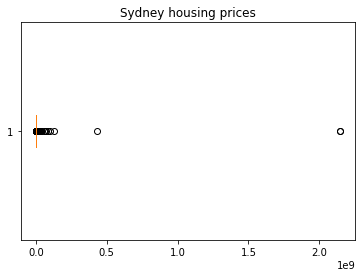

In [30]:
red_square = dict(markerfacecolor='r', marker='s')
fig1, ax1 = plt.subplots()
ax1.set_title('Sydney housing prices')
ax1.boxplot(df['sellPrice'], vert=False, flierprops=red_square)
plt.show()

In [42]:
# Remove outliers 
df = df[~(df['sellPrice'] >= (df['sellPrice'].mean() + 3*df['sellPrice'].std())) | (df['sellPrice'] <= (df['sellPrice'].mean() - 3*df['sellPrice'].std()))]

In [43]:
df

,Date,suburb,postalCode,sellPrice,bed,bath,car,propType,latitude,longitude
0,2019-06-19,Avalon Beach,2107,1210000,4.0,2,2.0,house,33°38′01″S,151°19′57″E
1,2019-06-13,Avalon Beach,2107,2250000,4.0,3,4.0,house,33°38′01″S,151°19′57″E
2,2019-06-07,Whale Beach,2107,2920000,3.0,3,2.0,house,33°36′46″S,151°19′38″E
3,2019-05-28,Avalon Beach,2107,1530000,3.0,1,2.0,house,33°38′01″S,151°19′57″E
4,2019-05-22,Whale Beach,2107,8000000,5.0,4,4.0,house,33°36′46″S,151°19′38″E
...,...,...,...,...,...,...,...,...,...,...
199499,2014-06-20,Illawong,2234,1900000,5.0,3,7.0,house,34°00′02″S,151°02′09″E
199500,2014-05-26,Illawong,2234,980000,4.0,3,2.0,house,34°00′02″S,151°02′09″E
199501,2014-04-17,Alfords Point,2234,850000,4.0,2,2.0,house,33°59′05″S,151°01′17″E
199502,2013-09-07,Illawong,2234,640000,3.0,2,2.0,townhouse,34°00′02″S,151°02′09″E


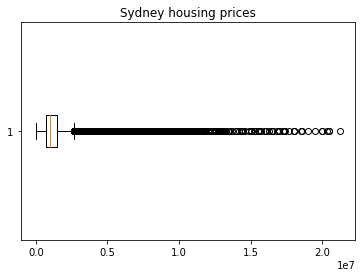

In [45]:
fig2, ax2 = plt.subplots()
ax2.set_title('Sydney housing prices')
ax2.boxplot(df['sellPrice'], vert=False)
plt.show()

In [48]:
df[df['sellPrice'] <=1000]

,Date,suburb,postalCode,sellPrice,bed,bath,car,propType,latitude,longitude
1036,2011-03-30,Avalon Beach,2107,700,3.0,2,1.0,house,33°38′01″S,151°19′57″E
7648,2008-09-27,Killara,2071,2,4.0,3,2.0,house,33°46′07″S,151°09′48″E
7656,2008-07-02,Killara,2071,1,4.0,3,2.0,house,33°46′07″S,151°09′48″E
13394,2014-07-25,Cronulla,2230,1000,5.0,4,2.0,house,34°03′27″S,151°09′08″E
13791,2010-03-09,Burraneer,2230,770,3.0,1,1.0,house,34°04′12″S,151°08′12″E
14369,2008-08-15,Drummoyne,2047,640,3.0,3,2.0,townhouse,33°51′13″S,151°09′14″E
21672,2012-03-24,St Ives,2075,1000,4.0,2,NaN,house,33°43′17″S,151°10′06″E
21683,2012-01-25,St Ives,2075,1000,5.0,3,2.0,house,33°43′17″S,151°10′06″E
23124,2018-05-01,Hurstville,2220,1000,2.0,1,2.0,house,33°58′05″S,151°06′15″E
23997,2010-04-10,Hurstville Grove,2220,858,4.0,3,1.0,house,33°58′47″S,151°5′35″E


#### 3.2. Handle missing data

#### 4. Explore features

#### 4.1. Group by Suburb and Property type

In [7]:
sub_mean = df.groupby(by=['suburb', 'propType']).mean().round(0)
sub_count = df.groupby(by=['suburb', 'propType']).count()
sub_mean['total'] = sub_count['postalCode']
sub_mean.rename(columns={'sellPrice': 'avgPrice'}, inplace=True)

In [8]:
sub_mean

postalCode   avgPrice  bed  bath  car  total
suburb     propType                                                          
Abbotsbury house                     2176.0  1056444.0  4.0   3.0  2.0    125
Abbotsford duplex/semi-detached      2046.0  1172000.0  2.0   2.0  3.0      1
           house                     2046.0  1967716.0  3.0   2.0  2.0    132
           terrace                   2046.0  2500000.0  3.0   2.0  2.0      1
           townhouse                 2046.0  1005160.0  2.0   2.0  2.0    100
...                                     ...        ...  ...   ...  ...    ...
Yowie Bay  villa                     2228.0   953000.0  3.0   2.0  2.0      7
Zetland    duplex/semi-detached      2017.0  1038125.0  2.0   1.0  1.0      4
           house                     2017.0  1199356.0  3.0   2.0  1.0    102
           terrace                   2017.0  1259583.0  3.0   2.0  1.0     18
           townhouse                 2017.0  1026650.0  3.0   2.0  2.0     10

[2057 rows x 6 columns]